# Постановка задачи:
От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#from google.colab import drive

#drive.mount('/content/drive', force_remount=True)
filename = 'netflix-rotten-tomatoes-metacritic-imdb.csv'
import csv

data = pd.read_csv(filename, sep = ',', header=0, engine = 'python')
data

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,K-POP Extreme Survival,NaN,"TV Dramas,TV Programmes,TV Comedies,Romantic T...",NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/80031595,NaN,Seung Yeon decides to chase her dream of becom...,NaN,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15476,DreamWorks Shreks Swamp Stories,NaN,"Animal Tales,Family Comedies,Family Adventures...",NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/70242630,NaN,"Shrek celebrates Halloween, Puss in Boots is c...",NaN,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15477,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/70259784,NaN,Madagascar goes wild with holiday spirit in th...,71.0,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...,NaN,NaN,NaN
15478,DreamWorks Holiday Classics,"Animation, Comedy, Family","TV Comedies,Kids TV,TV Cartoons,TV Programmes,...",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,...,2015-04-14,Fox,https://www.netflix.com/watch/70221348,NaN,Join your DreamWorks friends for these four ho...,82.0,https://occ-0-2851-38.1.nflxso

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

In [183]:
data.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,1.337900e+04
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.272841e+04
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,1.257012e+05
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,5.000000e+00
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,4.035000e+02
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,2.322000e+03
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,2.089050e+04
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,2.354197e+06


# Визуализируем данные

/var/folders/z5/7xwp8j4522d60g4vp92hrcs80000gn/T/ipykernel_1789/2194403622.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

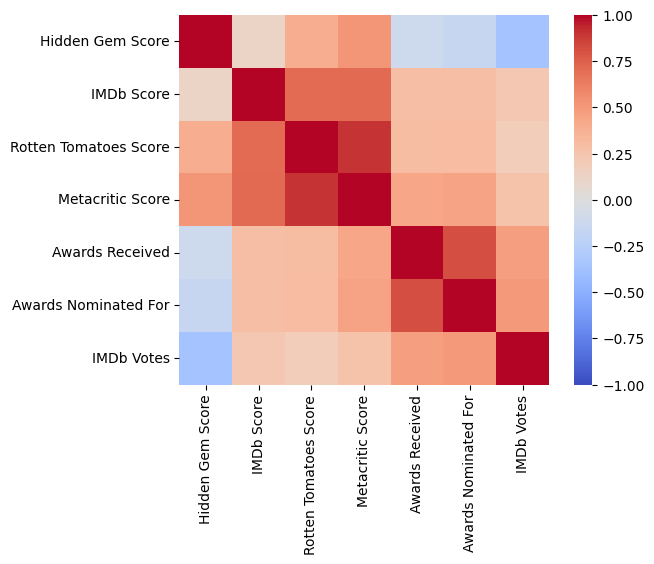

In [184]:
import sys
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

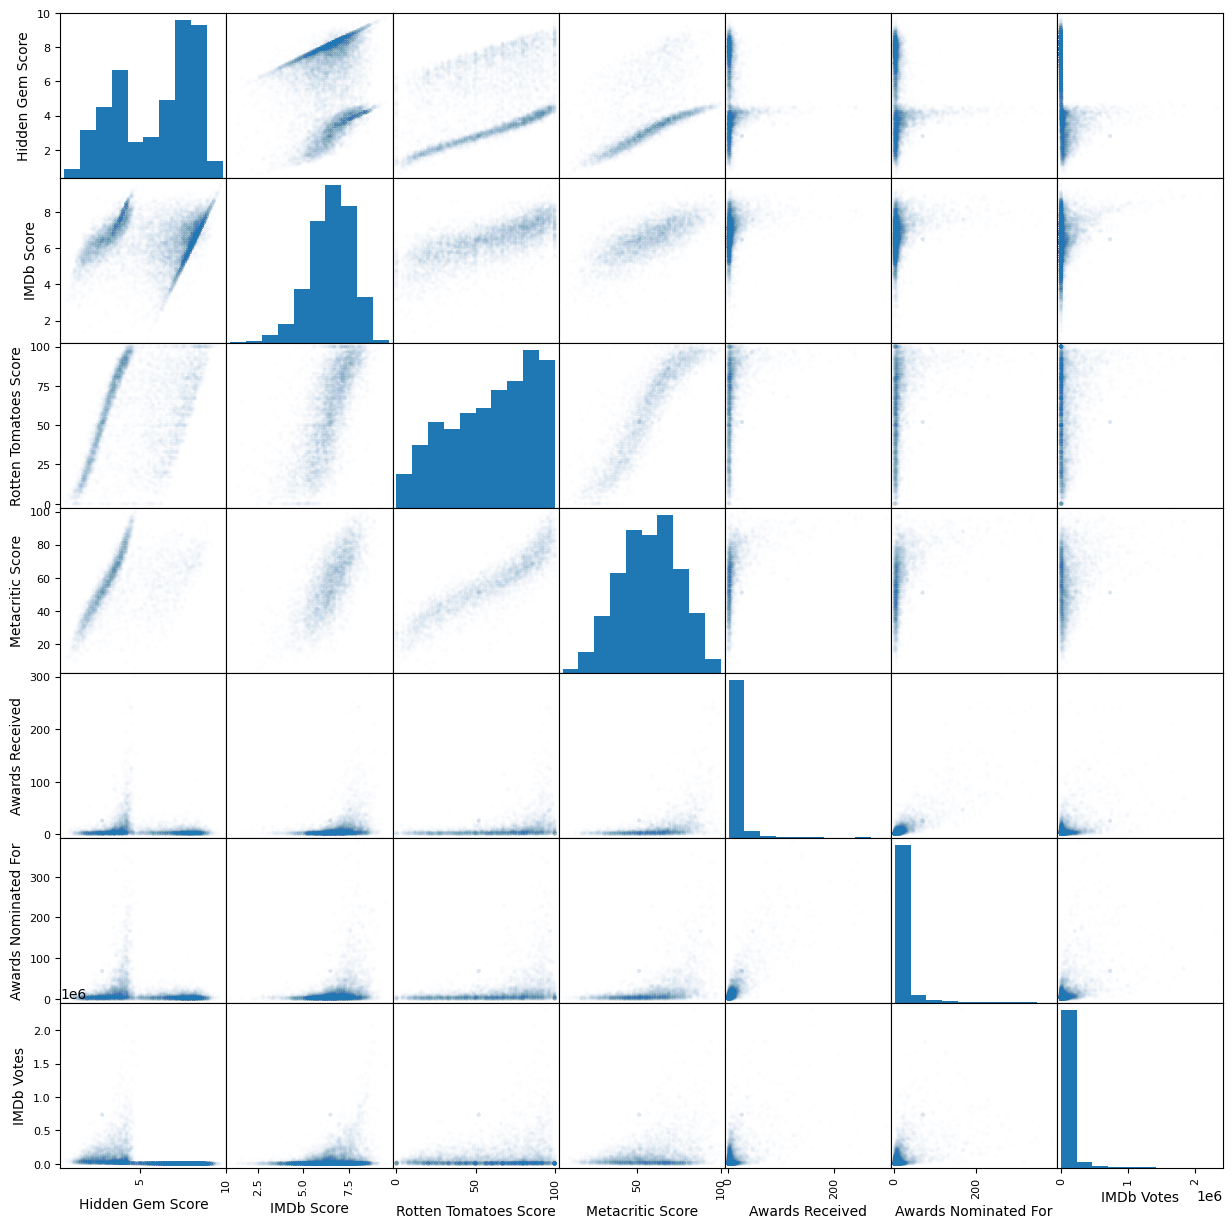

In [185]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (15, 15))
pass

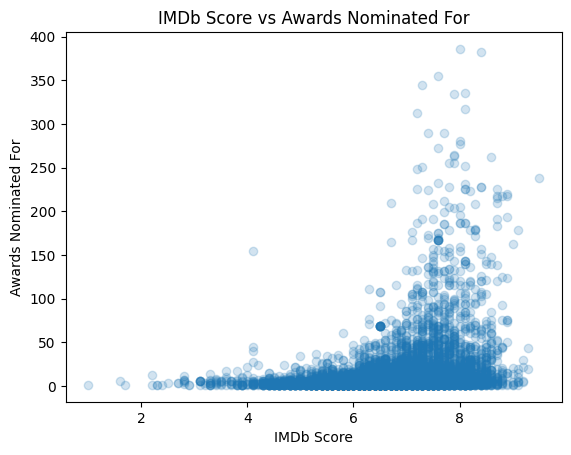

In [186]:
plt.plot(data['IMDb Score'], data['Awards Nominated For'], 'o', alpha = 0.2)
plt.xlabel('IMDb Score')
plt.ylabel('Awards Nominated For')
plt.title('IMDb Score vs Awards Nominated For')
pass

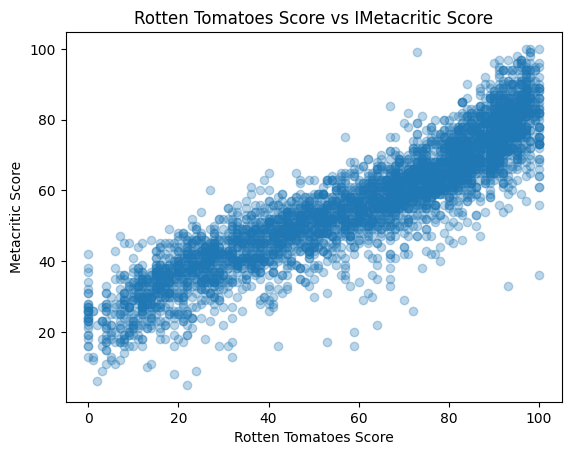

In [187]:
plt.plot(data['Rotten Tomatoes Score'], data['Metacritic Score'], 'o', alpha = 0.3)
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Metacritic Score')
plt.title('Rotten Tomatoes Score vs IMetacritic Score')
pass

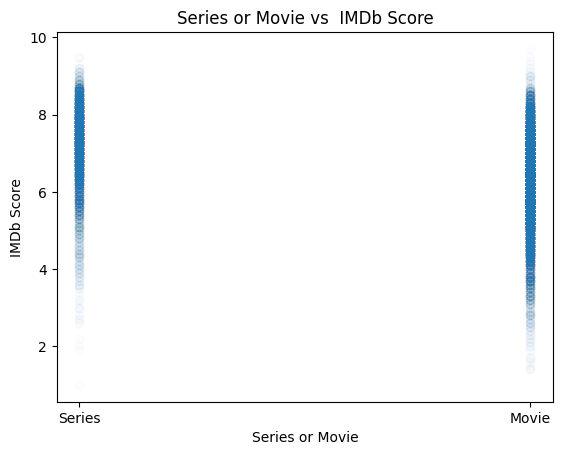

In [188]:
plt.plot(data['Series or Movie'], data['IMDb Score'], 'o', alpha = 0.01)
plt.xlabel('Series or Movie')
plt.ylabel('IMDb Score')
plt.title('Series or Movie vs  IMDb Score')
pass

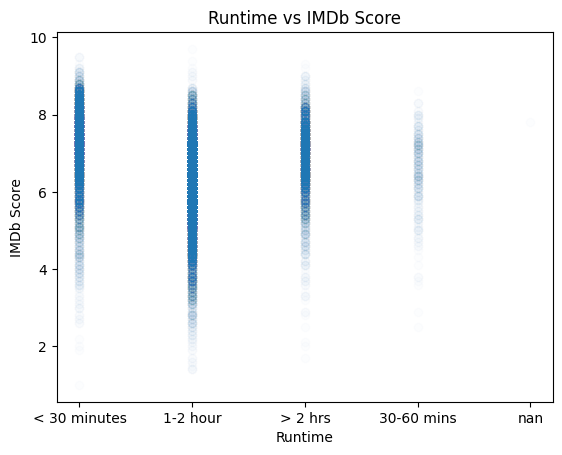

In [189]:
plt.plot(data['Runtime'].astype(str), data['IMDb Score'], 'o', alpha = 0.01)
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')
plt.title('Runtime vs IMDb Score')
pass

По данным графикам можно установить, что сериалы и длинные фильмы (больше 2 часов), в основном получают высокие оценки. Или, что в основом фильмы с высоким рейтингом IMDb номинируются на награды.

# Готовим данные

Удалим некоторые признаки c большим количеством уникальных значей из датасета. А так же значение NaN

In [190]:
data = data.drop(labels=["Title", "Summary"], axis=1)
data = data.drop(labels=["Release Date", "Netflix Link", "Netflix Release Date", "IMDb Link"], axis=1)
data = data.drop(labels=["Image", "TMDb Trailer", "Poster"], axis=1)
data = data.drop(labels=["Boxoffice", "Country Availability", "Tags", "Trailer Site"], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre                  13770 non-null  object 
 1   Languages              13545 non-null  object 
 2   Series or Movie        15480 non-null  object 
 3   Hidden Gem Score       13379 non-null  float64
 4   Runtime                15479 non-null  object 
 5   Director               10772 non-null  object 
 6   Writer                 11150 non-null  object 
 7   Actors                 13555 non-null  object 
 8   View Rating            8456 non-null   object 
 9   IMDb Score             13381 non-null  float64
 10  Rotten Tomatoes Score  6382 non-null   float64
 11  Metacritic Score       4336 non-null   float64
 12  Awards Received        6075 non-null   float64
 13  Awards Nominated For   7661 non-null   float64
 14  Production House       5149 non-null   object 
 15  IM

Перепишем некоторые пропущенные значения

In [191]:
values = {"Runtime": "1-2 hour", "Hidden Gem Score": 5.937551, "View Rating": "Unrated", "IMDb Score": 6.496054, "IMDb Votes": 4.272841e+04, "Awards Received": 0,
          "Awards Nominated For": 0}
data = data.fillna(value=values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genre                  13770 non-null  object 
 1   Languages              13545 non-null  object 
 2   Series or Movie        15480 non-null  object 
 3   Hidden Gem Score       15480 non-null  float64
 4   Runtime                15480 non-null  object 
 5   Director               10772 non-null  object 
 6   Writer                 11150 non-null  object 
 7   Actors                 13555 non-null  object 
 8   View Rating            15480 non-null  object 
 9   IMDb Score             15480 non-null  float64
 10  Rotten Tomatoes Score  6382 non-null   float64
 11  Metacritic Score       4336 non-null   float64
 12  Awards Received        15480 non-null  float64
 13  Awards Nominated For   15480 non-null  float64
 14  Production House       5149 non-null   object 
 15  IM

Удалим столбцы где пропущенных значений слишком много

In [192]:
data = data.drop(labels=["Rotten Tomatoes Score", "Metacritic Score", "Production House"], axis=1)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9912 entries, 0 to 15473
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Genre                 9912 non-null   object 
 1   Languages             9912 non-null   object 
 2   Series or Movie       9912 non-null   object 
 3   Hidden Gem Score      9912 non-null   float64
 4   Runtime               9912 non-null   object 
 5   Director              9912 non-null   object 
 6   Writer                9912 non-null   object 
 7   Actors                9912 non-null   object 
 8   View Rating           9912 non-null   object 
 9   IMDb Score            9912 non-null   float64
 10  Awards Received       9912 non-null   float64
 11  Awards Nominated For  9912 non-null   float64
 12  IMDb Votes            9912 non-null   float64
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [193]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if ((data[c].dtype.name != 'object') & (c != "IMDb Score"))]
numerical_columns

['Hidden Gem Score', 'Awards Received', 'Awards Nominated For', 'IMDb Votes']

Разделим категориальные признаки на бинарные и небинарные. Для бинарных признаков заменим значения на 0 и 1. К небинарным признакам применим метод векторизации.

In [194]:
binary_columns    = [c for c in categorical_columns if data.describe(include = [object])[c]['unique'] == 2]
print(binary_columns)

['Series or Movie']


In [195]:
data.loc[data['Series or Movie'] == 'Series', 'Series or Movie'] = 0
data.loc[data['Series or Movie'] == 'Movie', 'Series or Movie'] = 1

In [196]:
categorical_columns

['Genre',
 'Languages',
 'Series or Movie',
 'Runtime',
 'Director',
 'Writer',
 'Actors',
 'View Rating']

In [197]:
Runtime = data['Runtime'].str.get_dummies()
Director = data['Director'].str.get_dummies(",")
View = data['View Rating'].str.get_dummies()
Writer = data['Writer'].str.get_dummies(",")
Actors = data['Actors'].str.get_dummies(",")
Genre = data['Genre'].str.get_dummies(",")
Languages = data['Languages'].str.get_dummies(",")

In [198]:
data_nonbinary = pd.concat((Runtime, Director, View, Actors,Writer, Genre, Languages), axis = 1)
data_nonbinary

,1-2 hour,30-60 mins,< 30 minutes,> 2 hrs,Aamir Khan,Aaron Horvath,Aaron Seelman,Aaron Seltzer,Abbas Alibhai Burmawalla,Abdullah Al Noor,...,Turkish,Ukrainian,Urdu,Vietnamese,Wayuu,Wolof,Xhosa,Yiddish,Yoruba,Zulu
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15462,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15463,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15464,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15465,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Округлим рейтиг IMDb до целого числа. Далее будем его предсказывать.

In [199]:
data['IMDb Score'] = np.round(data['IMDb Score'])
data['IMDb Score'].describe()

count    9912.000000
mean        6.276836
std         1.118377
min         1.000000
25%         6.000000
50%         6.000000
75%         7.000000
max         9.000000
Name: IMDb Score, dtype: float64

Нормализуем количественные признаки

In [200]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical

,Hidden Gem Score,Awards Received,Awards Nominated For,IMDb Votes
0,-0.526493,4.931773,2.053280,1.082806
1,0.678393,-0.248167,-0.365372,-0.363117
2,0.410641,-0.319125,-0.365372,-0.371076
5,1.392400,-0.319125,-0.365372,-0.382390
8,1.258524,-0.177209,-0.322940,-0.382696
...,...,...,...,...
15462,-1.374375,-0.248167,-0.238075,-0.309491
15463,-1.731378,-0.248167,-0.322940,-0.095509
15464,-0.928121,-0.319125,-0.322940,-0.077411
15465,-1.061997,-0.319125,0.101385,0.811660


Cоединяем данные

In [201]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns], data["IMDb Score"]), axis = 1)

# Разбиение
Будем предсказывать рейтинг IMDb

In [202]:
X = data.drop('IMDb Score', axis = 1) 
y = data['IMDb Score']
X=X.to_numpy()
y=y.to_numpy()

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

8920 992 (8920,) (992,)


In [204]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

# Обучение

In [205]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 27)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)
print("err_train=", err_train)
print("err_test=", err_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

err_train= 0.49730941704035875
err_test= 0.5443548387096774
[[   0    0    1    0    0    1    1    0    0]
 [   0    0    1    0    2   23    0    3    0]
 [   0    0    1    2    5   74    8   13    0]
 [   0    0    0    4   26  320   59   48    0]
 [   0    0    1    2   74  808  162   83    0]
 [   0    0    0    0   34 2712  497  159    0]
 [   0    0    0    0    9 1212 1291  149    0]
 [   0    0    0    0    1  266  435  396    0]
 [   0    0    0    0    0    6    6   19    6]]

[[  0   0   0   0   2   0   1   0]
 [  0   0   0   0  13   0   3   0]
 [  0   0   1   2  37   8   3   0]
 [  0   0   0   6 103  11  11   0]
 [  0   0   0   8 273  69  19   0]
 [  0   0   0   3 144 132  14   0]
 [  0   0   0   0  32  55  40   0]
 [  0   0   0   0   0   0   2   0]]



Наилучший результат достигается при n_neighbors=27

# Вывод
Погрешность на обучающей и тестовой выборках достаточно велика. Во многом на это повлиял тот факт, что в датасете было недостаточно данных. Оказалось много пропущенных значений.

# Лабораторная работа 2

## Логическая регрессия 

In [206]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)

y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_predict)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_predict)}", end="\n\n")

err_train=0.00616591928251121
err_test=0.5030241935483871

train confusion matrix:
[[   3    0    0    0    0    0    0    0    0]
 [   0   27    0    0    0    2    0    0    0]
 [   0    0  102    0    0    1    0    0    0]
 [   0    0    0  450    2    3    2    0    0]
 [   0    0    0    1 1120    8    1    0    0]
 [   0    0    0    0    1 3390    7    4    0]
 [   0    0    0    0    0    1 2656    4    0]
 [   0    0    0    0    0    4    8 1086    0]
 [   0    0    0    0    0    2    0    4   31]]

test confusion matrix:
[[  0   0   0   0   3   0   0   0]
 [  0   1   1   1  12   1   0   0]
 [  0   0   4   5  41   1   0   0]
 [  0   0   3  19 101   7   1   0]
 [  0   0   0  14 271  81   3   0]
 [  0   0   0   5 119 154  15   0]
 [  0   0   0   0  26  56  44   1]
 [  0   0   0   0   0   1   1   0]]



## Random Forest

In [207]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_predict)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_predict)}", end="\n\n")

err_train=0.0
err_test=0.4173387096774194

train confusion matrix:
[[   3    0    0    0    0    0    0    0    0]
 [   0   29    0    0    0    0    0    0    0]
 [   0    0  103    0    0    0    0    0    0]
 [   0    0    0  457    0    0    0    0    0]
 [   0    0    0    0 1130    0    0    0    0]
 [   0    0    0    0    0 3402    0    0    0]
 [   0    0    0    0    0    0 2661    0    0]
 [   0    0    0    0    0    0    0 1098    0]
 [   0    0    0    0    0    0    0    0   37]]

test confusion matrix:
[[  0   0   0   0   3   0   0   0]
 [  0   1   0   0  15   0   0   0]
 [  0   1   3   2  45   0   0   0]
 [  0   0   1  12 115   3   0   0]
 [  0   0   0   1 325  43   0   0]
 [  0   0   0   0  87 198   8   0]
 [  0   0   0   0  22  66  39   0]
 [  0   0   0   0   0   1   1   0]]



## Полносвязная неглубокая нейронная сеть (adam solver)

In [208]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (20,),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 7, max_iter=100)

mlp_model.fit(X_train, y_train)

y_test_predict = mlp_model.predict(X_test)
y_train_predict = mlp_model.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(f"train confusion matrix:\n{confusion_matrix(y_train, y_train_predict)}", end="\n\n")
print(f"test confusion matrix:\n{confusion_matrix(y_test, y_test_predict)}", end="\n\n")

/Users/kseniazajceva/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


err_train=0.0016816143497757848
err_test=0.5252016129032258

train confusion matrix:
[[   0    0    0    0    0    3    0    0    0]
 [   0   29    0    0    0    0    0    0    0]
 [   0    0  103    0    0    0    0    0    0]
 [   0    0    0  457    0    0    0    0    0]
 [   0    0    0    2 1127    1    0    0    0]
 [   0    0    0    0    0 3400    2    0    0]
 [   0    0    0    0    0    2 2657    2    0]
 [   0    0    0    0    0    0    2 1096    0]
 [   0    0    0    0    0    0    0    1   36]]

test confusion matrix:
[[  0   0   0   0   2   1   0   0]
 [  0   1   2   3   9   1   0   0]
 [  0   2   7   9  31   2   0   0]
 [  0   1   7  23  88  11   1   0]
 [  0   0   2  21 239 100   7   0]
 [  0   0   2   8 100 149  34   0]
 [  0   0   0   0  22  52  52   1]
 [  0   0   0   0   0   1   1   0]]



In [210]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 2, 10)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (20,), 
                              solver = 'adam', activation = 'logistic', max_iter=100, random_state = 7)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

/Users/kseniazajceva/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kseniazajceva/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kseniazajceva/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/kseniazajceva/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
 

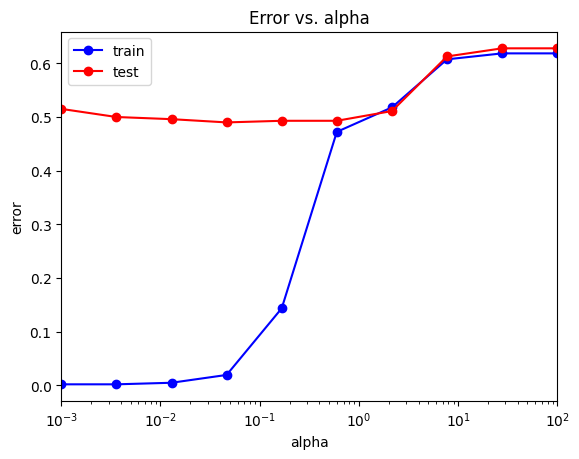

In [211]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

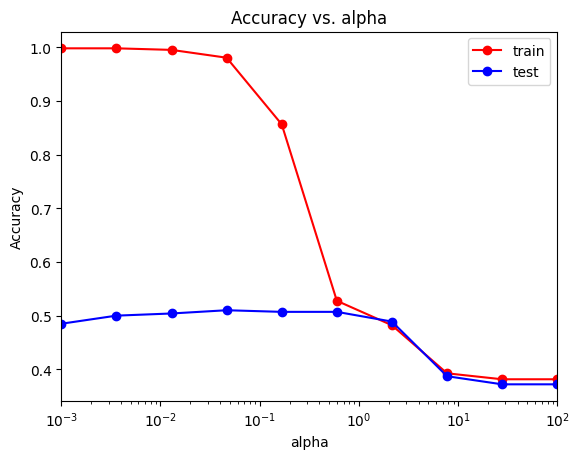

In [212]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [213]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(f"{min_train_err=}\n{min_test_err=}")

min_train_err=0.0016816143497757848
min_test_err=0.4899193548387097


In [214]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(f"{alpha_opt=}")

alpha_opt=array([0.04641589])


## Вывод
Ошибка на тестовой выборке осталась высокой. При этом для алгоримов логической регрессии и Random Forest произошло переобучение. В случае неглубокой нейросети переобучение происходит при alpha примерно меньше 1.